In [1]:
import numpy as np
from scipy.optimize import fmin

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
# Function definitions
def fit1(x0, x, y):
    """Maximum Error (l_inf)"""
    return abs(x0[0]*x + x0[1] - y).max()

def fit2(x0, x, y):
    """Mean Absolute Error (l_1)"""
    return abs(x0[0]*x + x0[1] - y).sum()

def fit3(x0, x, y):
    """Least Squares Error (l_2)"""
    return ((x0[0]*x + x0[1] - y)**2).sum()

In [3]:
x = np.arange(1, 11)
xf = np.arange(0, 11, 0.1)
x0 = [1, 1]

y_clean = [0.2, 0.5, 0.3, 0.7, 1.0, 1.5, 1.8, 2.0, 2.3, 2.2]
p1 = fmin(fit1, x0, args=(x, y_clean), disp=False)
p2 = fmin(fit2, x0, args=(x, y_clean), disp=False)
p3 = fmin(fit3, x0, args=(x, y_clean), disp=False)
y1_clean = np.polyval(p1, xf)
y2_clean = np.polyval(p2, xf)
y3_clean = np.polyval(p3, xf)

y_outlier = [0.2, 0.5, 0.3, 3.5, 1.0, 1.5, 1.8, 2.0, 2.3, 2.2]
p1 = fmin(fit1, x0, args=(x, y_outlier), disp=False)
p2 = fmin(fit2, x0, args=(x, y_outlier), disp=False)
p3 = fmin(fit3, x0, args=(x, y_outlier), disp=False)
y1_outlier = np.polyval(p1, xf)
y2_outlier = np.polyval(p2, xf)
y3_outlier = np.polyval(p3, xf)

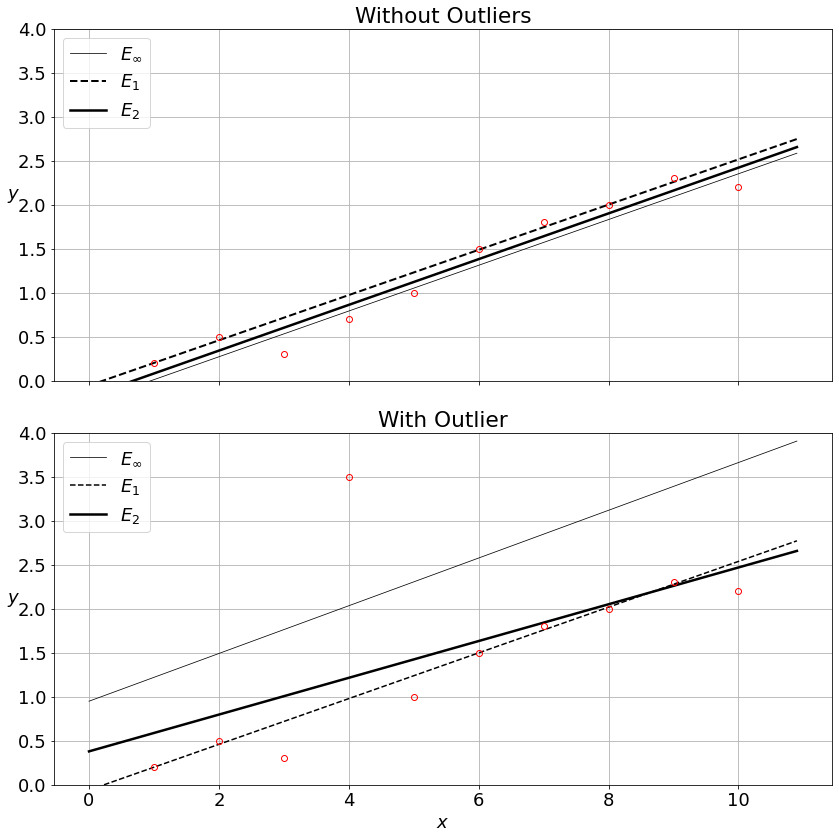

In [4]:
# Figure 4.2

fig, axs = plt.subplots(2, 1, tight_layout=True, sharex=True, sharey=True, figsize=(12, 12))

axs[0].plot(xf, y1_clean, color='black', linewidth=0.75, label='$E_\infty$')
axs[0].plot(xf, y2_clean, '--', color='black', linewidth=2, label='$E_1$')
axs[0].plot(xf, y3_clean, color='black', linewidth=2.5, label='$E_2$')
axs[0].plot(x, y_clean, 'o', color='red', markerfacecolor='none', linewidth=2)
axs[0].legend(loc='upper left')
axs[0].grid(True)
axs[0].set_ylabel('$y$', rotation=0)
axs[0].set_title('Without Outliers')

axs[1].plot(xf, y1_outlier, color='black', linewidth=0.75, label='$E_\infty$')
axs[1].plot(xf, y2_outlier, '--', color='black', label='$E_1$')
axs[1].plot(xf, y3_outlier, color='black', linewidth=2.5, label='$E_2$')
axs[1].plot(x, y_outlier, 'o', color='red', markerfacecolor='none', linewidth=2)
axs[1].set_ylim(0, 4)
axs[1].legend(loc='upper left')
axs[1].grid(True)
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$y$', rotation=0)
axs[1].set_title('With Outlier');